In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import os
import glob
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import savgol_filter
from scipy import integrate

%matplotlib inline


In [2]:
cd /Users/austinmcdonald/Desktop/data/fluorescin/8-26-16

/Users/austinmcdonald/Desktop/data/fluorescin/8-26-16


In [3]:
os.listdir()

['.DS_Store',
 'dry',
 'dry2',
 'info.txt',
 'tir10-1.csv',
 'tir10-2.csv',
 'tir10-3.csv',
 'tir10-4.csv',
 'tir10-5.csv',
 'tir50-1.csv',
 'tir50-2.csv',
 'tir50-3.csv',
 'tir50-4.csv',
 'tir50-5.csv',
 'tir90-1.csv',
 'tir90-2.csv',
 'tir90-3.csv',
 'tir90-4.csv',
 'tir90-5.csv',
 'water1.csv',
 'water2.csv']

In [4]:
datass = None
datass = []
for files in glob.glob("*.csv"):
    datass.append(files)
dat10 = datass[0:5]
dat50 = datass[5:10]
dat90 = datass[10:15]

dat90

['tir90-1.csv', 'tir90-2.csv', 'tir90-3.csv', 'tir90-4.csv', 'tir90-5.csv']

In [5]:
data10 = dict()
dataf10= dict()
data50 = dict()
dataf50= dict()
data90 = dict()
dataf90= dict()
for x in range(0,5):
    data10[x] = pd.read_csv(dat10[x],delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
    data10[x]['dif'] = data10[x]['sig'].diff().abs()
    dataf10[x] = data10[x][data10[x]['dif']<.04]

    data50[x] = pd.read_csv(dat50[x],delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
    data50[x]['dif'] = data50[x]['sig'].diff().abs()
    dataf50[x] = data50[x][data50[x]['dif']<.04]
    
    data90[x] = pd.read_csv(dat90[x],delimiter=",",names = ['wave','sig'],skiprows=33,skipfooter=1,engine='python')
    data90[x]['dif'] = data90[x]['sig'].diff().abs()
    dataf90[x] = data90[x][data90[x]['dif']<.1]


In [6]:
data90m = pd.DataFrame()
data50m = pd.DataFrame()
data10m = pd.DataFrame()
data90m['wave']= dataf90[1]['wave']
data90m['sig']=(dataf90[1]['sig']+dataf90[2]['sig']+dataf90[3]['sig']+dataf90[4]['sig']+dataf90[0]['sig'])/(5)
data50m['wave']= dataf50[1]['wave']
data50m['sig']=(dataf50[1]['sig']+dataf50[2]['sig']+dataf50[3]['sig']+dataf50[4]['sig']+dataf50[0]['sig'])/(5)
data10m['wave']= dataf10[1]['wave']
data10m['sig']=(dataf10[1]['sig']+dataf10[2]['sig']+dataf10[3]['sig']+dataf10[4]['sig']+dataf10[0]['sig'])/(5)

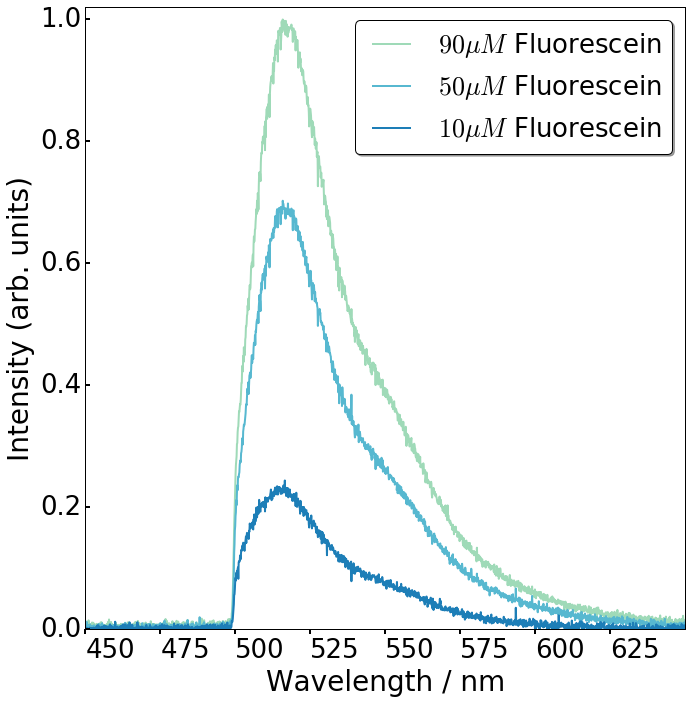

In [9]:
plt.figure(figsize=(10,10))
nor = max(data90m['sig'])

plt.plot(data90m['wave'],data90m['sig']/nor,color=cm.GnBu(2/5),label=r'$90 \mu M$'+' Fluorescein',linewidth=2)
plt.plot(data50m['wave'],data50m['sig']/nor,color=cm.GnBu(3/5),label=r'$50 \mu M$'+' Fluorescein',linewidth=2)
plt.plot(data10m['wave'],data10m['sig']/nor,color=cm.GnBu(4/5),label=r'$10 \mu M$'+' Fluorescein',linewidth=2)

plt.xlabel(r'Wavelength / nm', fontsize=28)
plt.ylabel('Intensity (arb. units)', fontsize=28)
#plt.title('Fluo-4 Calicum Induced Fluorescence', fontsize=32)
plt.legend(loc='upper right',fontsize=26,shadow=True, fancybox=True)
plt.xticks(fontsize = 26)
plt.yticks(fontsize = 26)
plt.xticks([450,475,500,525,550,575,600,625],ha='left')
plt.tick_params(top="off",right='off')
plt.tick_params(axis='x', direction='out',width=2,length=5)
plt.tick_params(axis='y',width=2,length=5)

plt.tight_layout()
plt.xlim(450,650)
plt.ylim(0,1.02)
#plt.savefig('/Users/austinmcdonald/Desktop/Plots/paper8-16/Ar_FL-TIR-good.pdf')
plt.show()